![bse_logo_textminingcourse](https://bse.eu/sites/default/files/bse_logo_small.png)

In [1]:
import pandas as pd

The mental health corpus, we can divide it into 2
	- One corpus with the 1 : Mentally ill People
	- Second corpus with the 0: Healthy people

Steps:

1. We split both corpus in train and test.
2. We extract a dictionary from each of those corpus.
3. ⁠Then we decide the way we are choosing to weight the frecuency of the words to decide which words of the ill people corpus we discard because are also frecuently mentioned on the Healthy people corpus.

This is already 90% of the proyect.

4. We do a simple logistic to test the accuracy of the dictionary that we generated.
5. ⁠We imporve if we feel like it or we have some free time

# Part 2: Develop Methodology


Data generated in the pre-processing part is loaded here

In [13]:
df = pd.read_csv("data/preprocessing/mental_health_preprocessed.csv")
df.head()

,Unnamed: 0,text,label,text_no_stopwords,text_stem,text_lemma
0,0,dear american teens question dutch person hear...,0,dear american teens question dutch person hear...,dear american teen question dutch person heard...,dear american teen question dutch person hear ...
1,1,nothing look forward lifei dont many reasons k...,1,nothing look forward lifei dont many reasons k...,noth look forward lifei dont mani reason keep ...,look forward lifei not reason going feel keep ...
2,2,music recommendations im looking expand playli...,0,music recommendations looking expand playlist ...,music recommend look expand playlist usual gen...,music recommendation look expand playlist usua...
3,3,im done trying feel betterthe reason im still ...,1,done trying feel betterthe reason still alive ...,done tri feel betterth reason still aliv mum d...,try feel betterthe reason alive mum devastate ...
4,4,worried year old girl subject domestic physic...,1,worried year old girl subject domestic physica...,worri year old girl subject domest physicalmen...,worry year old girl subject domestic physicalm...


## 3. Understand the use of methods like Tf-idf

In [28]:
# Separate texts based on label
texts_0 = df[df["label"] == 0]["text_lemma"].dropna().tolist()  # Healthy group
texts_1 = df[df["label"] == 1]["text_lemma"].dropna().tolist()  # Mentally ill group

### 3.1. Analyzing using TF-IDF

Getting the first 30 features by class

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Apply TF-IDF separately for each group
vectorizer_0 = TfidfVectorizer(stop_words="english", max_features=30)
tfidf_0 = vectorizer_0.fit_transform(texts_0)
words_0 = vectorizer_0.get_feature_names_out()
scores_0 = np.asarray(tfidf_0.mean(axis=0)).flatten()

vectorizer_1 = TfidfVectorizer(stop_words="english", max_features=30)
tfidf_1 = vectorizer_1.fit_transform(texts_1)
words_1 = vectorizer_1.get_feature_names_out()
scores_1 = np.asarray(tfidf_1.mean(axis=0)).flatten()

# Create DataFrames with extracted words and scores
df_tfidf_0 = pd.DataFrame({"word": words_0, "score": scores_0}).sort_values(by="score", ascending=False)
df_tfidf_1 = pd.DataFrame({"word": words_1, "score": scores_1}).sort_values(by="score", ascending=False)

Visualizing Results

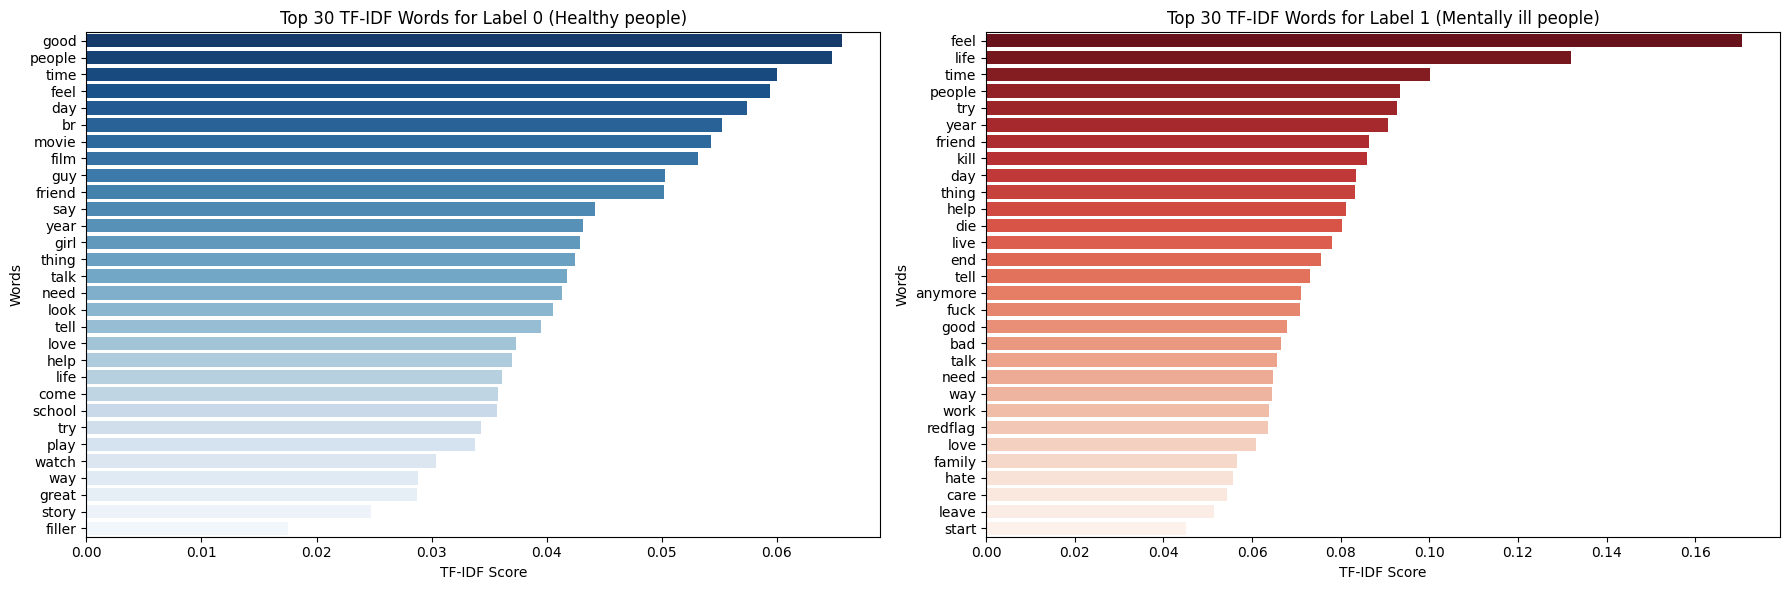

In [30]:
# Plot TF-IDF scores for both labels side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(y=df_tfidf_0["word"], x=df_tfidf_0["score"], hue=df_tfidf_0["word"], dodge=False, palette="Blues_r", ax=axes[0])
axes[0].set_title("Top 30 TF-IDF Words for Label 0 (Healthy people)")
axes[0].set_xlabel("TF-IDF Score")
axes[0].set_ylabel("Words")


sns.barplot(y=df_tfidf_1["word"], x=df_tfidf_1["score"], hue=df_tfidf_1["word"], dodge=False, palette="Reds_r", ax=axes[1])
axes[1].set_title("Top 30 TF-IDF Words for Label 1 (Mentally ill people)")
axes[1].set_xlabel("TF-IDF Score")
axes[1].set_ylabel("Words")

plt.tight_layout()
plt.show()


### 3.2. Generating Topics Using LDA

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA separately for each group
vectorizer_0_lda = CountVectorizer(stop_words="english", max_features=1000)
X_0 = vectorizer_0_lda.fit_transform(texts_0)

vectorizer_1_lda = CountVectorizer(stop_words="english", max_features=1000)
X_1 = vectorizer_1_lda.fit_transform(texts_1)

num_topics = 5
lda_model_0 = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model_0.fit(X_0)

lda_model_1 = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model_1.fit(X_1)

# Extract topic words
words_0_lda = vectorizer_0_lda.get_feature_names_out()
words_1_lda = vectorizer_1_lda.get_feature_names_out()

topics_0 = {}
topics_1 = {}

for topic_idx, topic in enumerate(lda_model_0.components_):
    top_words = [words_0_lda[i] for i in topic.argsort()[:-11:-1]]
    topics_0[f"Topic {topic_idx+1}"] = top_words

for topic_idx, topic in enumerate(lda_model_1.components_):
    top_words = [words_1_lda[i] for i in topic.argsort()[:-11:-1]]
    topics_1[f"Topic {topic_idx+1}"] = top_words

# Convert topics to DataFrame
df_topics_0 = pd.DataFrame(topics_0)
df_topics_1 = pd.DataFrame(topics_1)

# Display results
print("Topics for Label 0 (Healthy people):")
print(df_topics_0)

print("\nTopics for Label 1 (Mentally ill people):")
print(df_topics_1)

Topics for Label 0 (Healthy people):
  Topic 1    Topic 2 Topic 3 Topic 4   Topic 5
0    game         br     day  friend    filler
1    play       film    feel  people       wan
2    post      movie    time    girl        na
3    look       good    year    talk     water
4  reddit  character    good     say  nowdrink
5     guy      great    life    fuck      song
6   video      story  school     ask     bored
7     new       time   thing    tell      post
8   ampxb      watch   today     guy      love
9   watch       love   start    help       pee

Topics for Label 1 (Mentally ill people):
  Topic 1 Topic 2  Topic 3 Topic 4  Topic 5
0    feel    year     help  people     life
1  friend    tell     life    life     fuck
2    time    time  redflag    love     hate
3     day  friend   people    feel      die
4   thing     say     time     try     live
5    talk     mom      try    pain     kill
6     bad   start     need    care     feel
7    life  school     work   tired  fucking
8     t

### 3.3. Generating Topics with n-GRAMS

In [39]:
# Process n-grams separately for each class
# Label 0 (Healthy people)
vectorizer_ngrams_0 = CountVectorizer(ngram_range=(2, 3), max_features=10000)  # Limit feature size
X_ngrams_0 = vectorizer_ngrams_0.fit_transform(texts_0)
ngrams_counts_0 = X_ngrams_0.sum(axis=0).A1
ngrams_counts_df_0 = pd.DataFrame({'ngram': vectorizer_ngrams_0.get_feature_names_out(), 'count': ngrams_counts_0}).sort_values(by='count', ascending=False)
# print("Top N-grams for Label 0:")
# print(ngrams_counts_df_0.head(20))

# Label 1 (Mentally ill people)
vectorizer_ngrams_1 = CountVectorizer(ngram_range=(2, 3), max_features=10000)  # Limit feature size
X_ngrams_1 = vectorizer_ngrams_1.fit_transform(texts_1)
ngrams_counts_1 = X_ngrams_1.sum(axis=0).A1
ngrams_counts_df_1 = pd.DataFrame({'ngram': vectorizer_ngrams_1.get_feature_names_out(), 'count': ngrams_counts_1}).sort_values(by='count', ascending=False)
print("Top N-grams for Label 1:")
print(ngrams_counts_df_1.head(20))


print(ngrams_counts_df_1.head(20))

Top N-grams for Label 1:
                 ngram  count
9911          year old    978
3192             go to    904
3268       good friend    853
9273            wan na    756
9823          year ago    755
8027  suicidal thought    694
9555          will not    647
3773       high school    636
5799       not anymore    623
5890          not feel    571
2094          feel bad    560
1792          end life    557
5674         need help    540
4989         long time    538
1021    commit redflag    523
2902           get bad    488
5409     mental health    476
2384         feel well    444
5971          not live    442
5945          not help    432
                 ngram  count
9911          year old    978
3192             go to    904
3268       good friend    853
9273            wan na    756
9823          year ago    755
8027  suicidal thought    694
9555          will not    647
3773       high school    636
5799       not anymore    623
5890          not feel    571
2094          f

In [40]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA with a limited vocabulary size
num_topics = 10  # Define number of topics

lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_topics = lda_model.fit_transform(X_ngrams_1)

# Extract top words for each topic
def get_top_words(model, feature_names, n_top_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[f"Topic {topic_idx+1}"] = top_features
    return topics

# Get top words per topic
topics_dict = get_top_words(lda_model, vectorizer_ngrams_1.get_feature_names_out(), n_top_words=10)

# Convert to DataFrame
topics_df = pd.DataFrame(topics_dict)

topics_df


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,die die,end life,high school,wan na,year old,life worth,go to,not live,good friend,suicidal thought
1,pain sad,long time,get bad,need help,need talk,worth live,help help,not anymore,go to,year ago
2,suicidal thought,people care,feel well,help need,go to,not stop,year old,will not,will not,piece shit
3,sad pain,high school,year old,na die,will not,stop think,commit redflag,not feel,try help,fuck fuck
4,pain sad pain,not care,self harm,wan na die,not feel,life worth live,not anymore,good friend,long time,make feel
5,sad pain sad,hard try,commit redflag,need help need,suicidal thought,not stop think,help help help,year ago,not anymore,past year
6,try kill,friend family,video game,not wan,feel way,keep alive,not afford,not not,year ago,get well
7,feel good,not live,good friend,help need help,high school,live life,mental health,not talk,make feel,long time
8,mental health,year old,make feel,not wan na,need help,year old,go kill,not help,year old,year old
9,redflag note,live life,life feel,year ago,life not,thing keep,day day,feel bad,try talk,mental health


## 4. Decide on what type of content you want to track and how.

Following data analysis, we recommend implementing tracking of keywords and n-grams indicative of suicidal ideation and self-harm. 

## 5. Make your expectations explicit. Why would one care to track the type of vocabulary in your corpus? What interesting questions could be answered with this?

This will allow us to proactively identify and support individuals who may be at risk